# About Dataset
### Context : 
The Open Access Series of Imaging Studies (OASIS) is a project aimed at making MRI data sets of the brain freely available to the scientific community. By compiling and freely distributing MRI data sets, we hope to facilitate future discoveries in basic and clinical neuroscience. OASIS is made available by the Washington University Alzheimer’s Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)( at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University School of Medicine, and the Biomedical Informatics Research Network (BIRN).

### Content : 
- Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults :  This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.
- Longitudinal MRI Data in Nondemented and Demented Older Adults :  This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.
### Acknowledgements : 
When publishing findings that benefit from OASIS data, please include the following grant numbers in the acknowledgements section and in the associated Pubmed Central submission :  P50 AG05681, P01 AG03991, R01 AG021910, P20 MH071616, U24 RR0213

### Inspiration : 
Can you predict dementia? Alzheimer’s?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_row',40)
pd.set_option('display.max_column',100) 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First dataframe

- ID : Identification
- M/F : Gender
- Hand : Dominant Hand
- Age : Age in years
- Educ : Education Level
- SES : Socioeconomic Status
- MMSE : Mini Mental State Examination
- CDR : Clinical Dementia Rating
- eTIV : Estimated Total Intracranial Volume
- nWBV : Normalize Whole Brain Volume

In [3]:
df1 = pd.read_csv("D:\oasis_cross-sectional.csv")
df1.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
print('There is' , df1.shape[0] , 'rows')
print('There is' , df1.shape[1] , 'columns')

There is 436 rows
There is 12 columns


# Second dataframe
- ID : Subject identification
- MRI ID : MRI Exam Identification
- Group : Class
- Visit : Visit Order
- MR Delay : MR Delay Time (Contrast)
- M/F : Gender
- Hand : Dominant Hand
- Age : Age in years
- EDUC : Years of Education
- SES : Socioeconomic Status

In [5]:
df2 = pd.read_csv("D:\oasis_longitudinal.csv")
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
print('There is' , df2.shape[0] , 'rows')
print('There is' , df2.shape[1] , 'columns')

There is 373 rows
There is 15 columns


# Merge

In [7]:
# concatenate the two dataframes df1 and df2 into one dataframe called df, on columns ID for df1 and MRI ID for df2
df1.rename(columns={'ID':'MRI ID'},inplace=True)
df = pd.concat([df1,df2],ignore_index=True)
display(df.head())
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')


print("Remove the columns with more than 60% of missing values")
# Remove the columns with more than 60% of missing values :
df.drop(df.columns[df.isna().sum()/df.shape[0] > 0.6],axis=1,inplace=True)

# Remove rows whre Group is NaN
df.dropna(subset=['Group'],inplace=True)

df.drop(['EDUC', 'Subject ID'],axis=1,inplace=True)
display(df.head())
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')
missing = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)
display(pd.DataFrame(missing,columns=['Missing values (%)']))

,MRI ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,Group,Visit,MR Delay,EDUC
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN,NaN,NaN


There is 809 rows
There is 17 columns
Remove the columns with more than 60% of missing values


,MRI ID,M/F,Hand,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,Visit,MR Delay
436,OAS2_0001_MR1,M,R,87,2.0,27.0,0.0,1987,0.696,0.883,Nondemented,1.0,0.0
437,OAS2_0001_MR2,M,R,88,2.0,30.0,0.0,2004,0.681,0.876,Nondemented,2.0,457.0
438,OAS2_0002_MR1,M,R,75,NaN,23.0,0.5,1678,0.736,1.046,Demented,1.0,0.0
439,OAS2_0002_MR2,M,R,76,NaN,28.0,0.5,1738,0.713,1.010,Demented,2.0,560.0
440,OAS2_0002_MR3,M,R,80,NaN,22.0,0.5,1698,0.701,1.034,Demented,3.0,1895.0


There is 373 rows
There is 13 columns


,Missing values (%)
SES,5.093834
MMSE,0.536193
MRI ID,0.000000
Hand,0.000000
M/F,0.000000
Age,0.000000
CDR,0.000000
eTIV,0.000000
nWBV,0.000000
ASF,0.000000


In [8]:
for col in df.select_dtypes("object").columns[1:]:
    print(f'{col :-<50} {df[col].unique()}')

M/F----------------------------------------------- ['M' 'F']
Hand---------------------------------------------- ['R']
Group--------------------------------------------- ['Nondemented' 'Demented' 'Converted']


In [9]:
df.drop(['Hand'],axis=1,inplace=True) # drop the column Hand because it has only one value

In [10]:
# select from df only the columns with numerical values
df_num = df.select_dtypes(exclude="object")
# create a new column called Group, where 1 is for the patients with AD and 0 for the patients without AD
df_num['Group'] = df['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
corr = df_num.corr(method='pearson').abs()

##  Correlation Heatmap

**Correlation Strength:** The color intensity indicates how strongly variables are related

 * Deep red: Strong positive correlation (+1)
 * Deep blue: Strong negative correlation (-1)
 * White/light colors: Weak or no correlation (near 0)


**Numerical Values:** The numbers in each cell show the exact correlation coefficient between variables

**Hidden Redundancy:** The upper triangle is masked to avoid showing redundant information (correlation of A with B is the same as B with A)

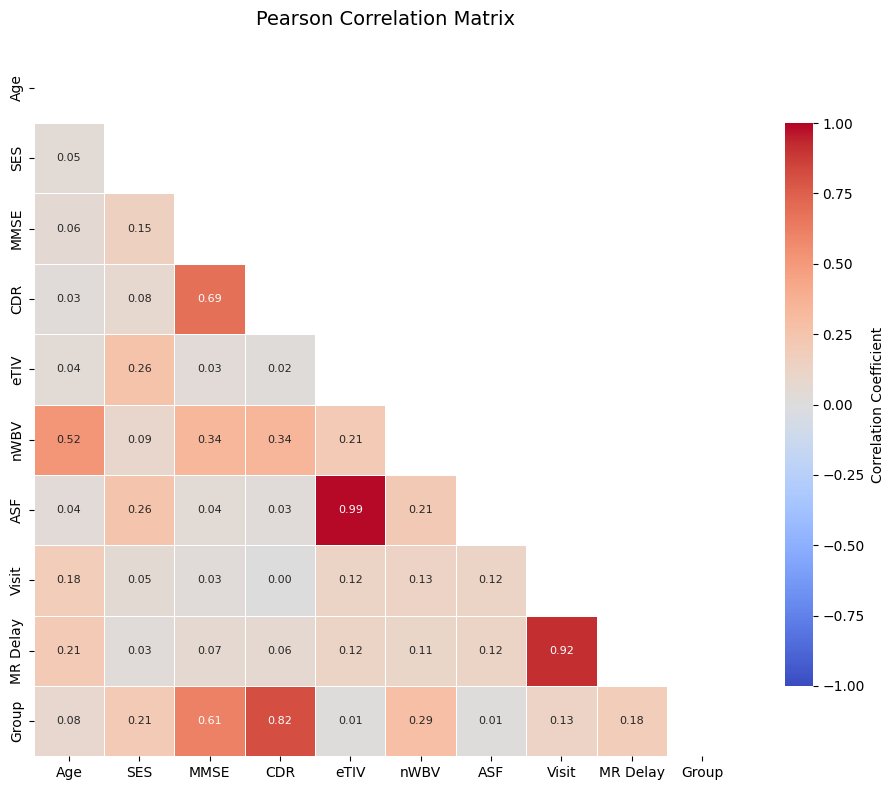

In [11]:
# Import required libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create figure and axes correctly
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

# Use a better color palette for correlation visualization
# 'coolwarm' is better for correlation as it shows negative/positive values clearly
mask = np.triu(np.ones_like(corr, dtype=bool))  # Create mask for upper triangle

# Plot the heatmap with improvements
sns.heatmap(
    corr,
    annot=True,           # Show values in cells
    fmt=".2f",            # Format to 2 decimal places
    cmap='coolwarm',      # Better colormap for correlations
    vmin=-1, 
    vmax=1,
    mask=mask,            # Hide upper triangle (reduces redundancy)
    linewidths=0.5,       # Add separation between cells
    annot_kws={"size": 8},# Adjust annotation text size
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},  # Customize colorbar
    ax=ax                 # Specify the axes
)

# Improve title and add more context
plt.title('Pearson Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

# Imputation

In [12]:
# import knninputer
from sklearn.impute import KNNImputer
# create an instance of KNNImputer
inputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# Input and print a report of what has been inputed
df = pd.DataFrame(inputer.fit_transform(df_num),columns=df_num.columns)
df.head()

,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay,Group
0,87.0,2.0,27.0,0.0,1987.0,0.696,0.883,1.0,0.0,0.0
1,88.0,2.0,30.0,0.0,2004.0,0.681,0.876,2.0,457.0,0.0
2,75.0,1.8,23.0,0.5,1678.0,0.736,1.046,1.0,0.0,1.0
3,76.0,1.6,28.0,0.5,1738.0,0.713,1.010,2.0,560.0,1.0
4,80.0,2.6,22.0,0.5,1698.0,0.701,1.034,3.0,1895.0,1.0


# Visualising Target and Features

In [13]:
def bar_chart(feature):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df2, x=feature, hue='Group', palette="coolwarm")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Group')
    plt.legend(['Nondemented', 'Demented'])
    plt.show()

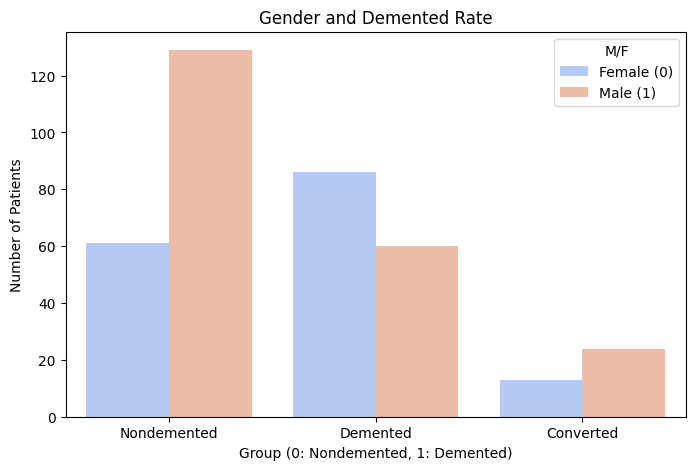

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_chart(feature):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df2, x='Group', hue=feature,  palette="coolwarm")
    plt.xlabel('Group (0: Nondemented, 1: Demented)')
    plt.ylabel('Number of Patients')
    plt.legend(title=feature, labels=['Female (0)', 'Male (1)'])
    plt.title('Gender and Demented Rate')
    plt.show()

bar_chart('M/F')


# Box Plot → Best for comparing medians, quartiles, and outliers.
A box plot is useful for comparing MMSE score medians and detecting outliers.

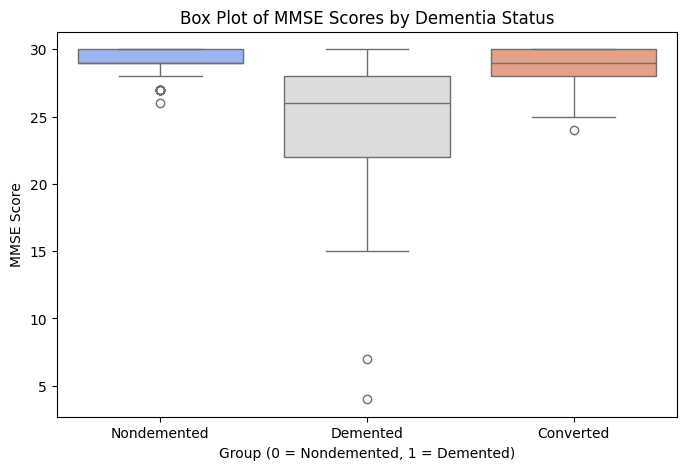

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Group", y="MMSE", data=df2, palette="coolwarm")

# Labels and title
plt.xlabel("Group (0 = Nondemented, 1 = Demented)")
plt.ylabel("MMSE Score")
plt.title("Box Plot of MMSE Scores by Dementia Status")

plt.show()



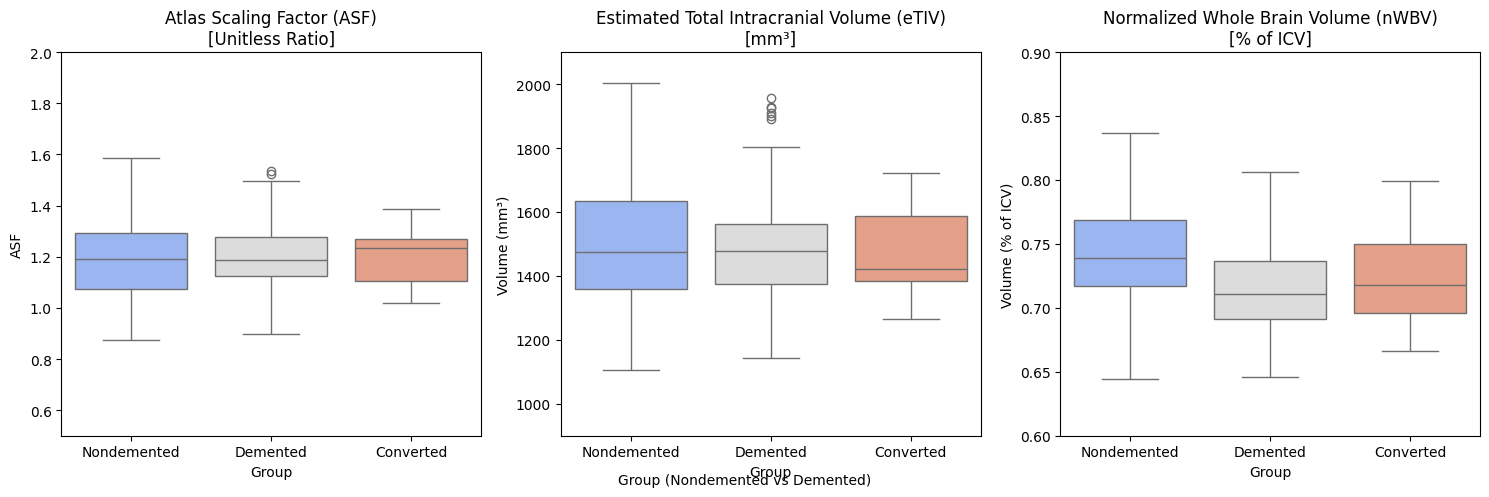

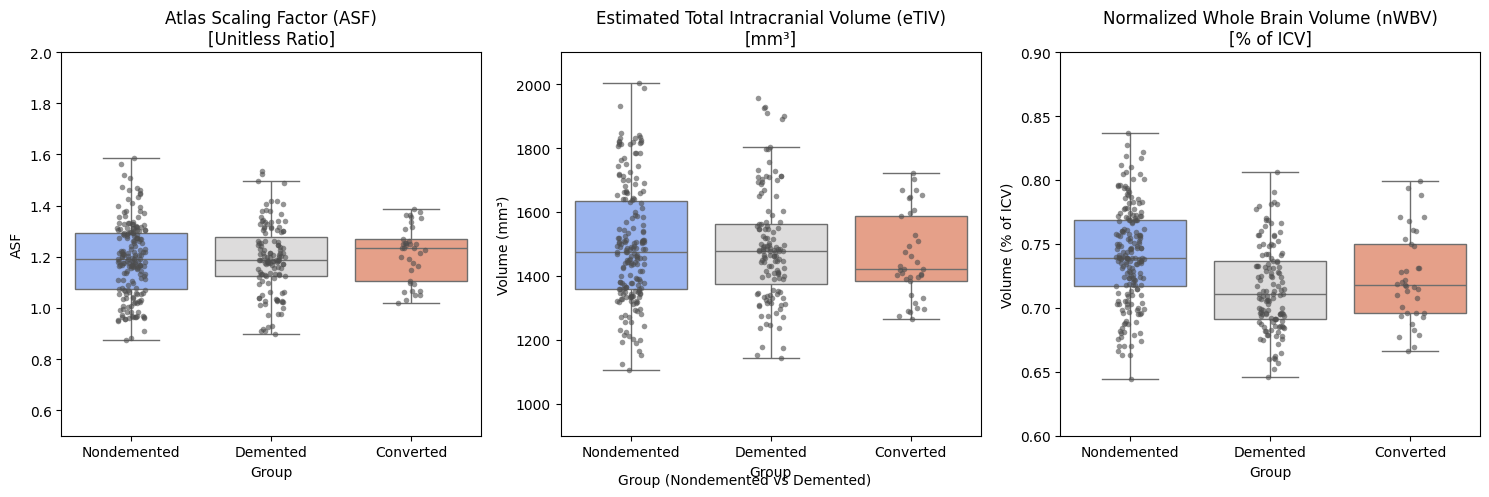

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace infinite values with NaN and drop NaNs
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for ASF (Atlas Scaling Factor)
sns.boxplot(x='Group', y='ASF', data=df2, ax=axes[0],palette="coolwarm")
axes[0].set_title('Atlas Scaling Factor (ASF)\n[Unitless Ratio]')
axes[0].set_ylim(0.5, 2)

# Box plot for eTIV (Estimated Total Intracranial Volume)
sns.boxplot(x='Group', y='eTIV', data=df2, ax=axes[1],palette="coolwarm")
axes[1].set_title('Estimated Total Intracranial Volume (eTIV)\n[mm³]')
axes[1].set_ylim(900, 2100)
axes[1].set_ylabel('Volume (mm³)')

# Box plot for nWBV (Normalized Whole Brain Volume)
sns.boxplot(x='Group', y='nWBV', data=df2, ax=axes[2],palette="coolwarm")
axes[2].set_title('Normalized Whole Brain Volume (nWBV)\n[% of ICV]')
axes[2].set_ylim(0.6, 0.9)
axes[2].set_ylabel('Volume (% of ICV)')

# Add common x-axis label
fig.text(0.5, 0.02, 'Group (Nondemented vs Demented)', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

# Version with individual data points
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot with individual points for ASF
sns.boxplot(x='Group', y='ASF', data=df2, ax=axes[0], showfliers=False,palette="coolwarm")
sns.stripplot(x='Group', y='ASF', data=df2, ax=axes[0], size=4, color='0.3', alpha=0.6)
axes[0].set_title('Atlas Scaling Factor (ASF)\n[Unitless Ratio]')
axes[0].set_ylim(0.5, 2)

# Box plot with individual points for eTIV
sns.boxplot(x='Group', y='eTIV', data=df2, ax=axes[1], showfliers=False,palette="coolwarm")
sns.stripplot(x='Group', y='eTIV', data=df2, ax=axes[1], size=4, color='0.3', alpha=0.6)
axes[1].set_title('Estimated Total Intracranial Volume (eTIV)\n[mm³]')
axes[1].set_ylim(900, 2100)
axes[1].set_ylabel('Volume (mm³)')

# Box plot with individual points for nWBV
sns.boxplot(x='Group', y='nWBV', data=df2, ax=axes[2], showfliers=False,palette="coolwarm")
sns.stripplot(x='Group', y='nWBV', data=df2, ax=axes[2], size=4, color='0.3', alpha=0.6)
axes[2].set_title('Normalized Whole Brain Volume (nWBV)\n[% of ICV]')
axes[2].set_ylim(0.6, 0.9)
axes[2].set_ylabel('Volume (% of ICV)')

# Add common x-axis label
fig.text(0.5, 0.02, 'Group (Nondemented vs Demented)', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

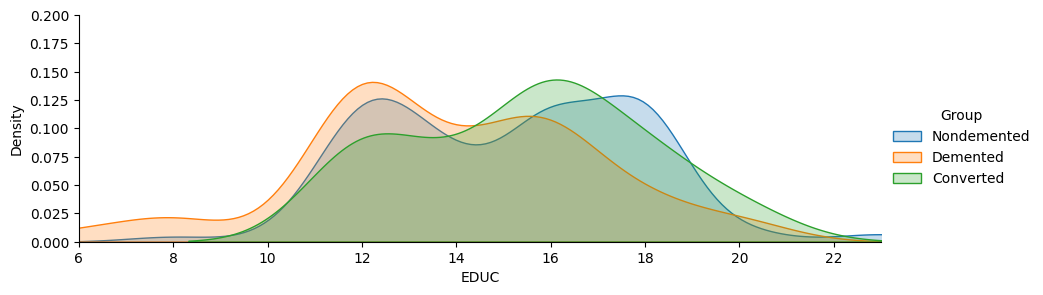

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if 'EDUC' in df2.columns and 'Group' in df2.columns:
    # Handle missing values in 'EDUC' (if any)
    df2['EDUC'].fillna(df2['EDUC'].median(), inplace=True)

    # KDE Plot with FacetGrid
    facet = sns.FacetGrid(df2, hue="Group", aspect=3)
    facet.map(sns.kdeplot, "EDUC", shade=True)
    facet.set(xlim=(df2["EDUC"].min(), df2["EDUC"].max()))
    facet.add_legend()
    plt.ylim(0, 0.20)
    plt.show()

else:
    print("Error: 'EDUC' or 'Group' column not found in the dataset. Check column names with df2.columns")


# Preprocessing and modeling

In [18]:
df.head()

,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay,Group
0,87.0,2.0,27.0,0.0,1987.0,0.696,0.883,1.0,0.0,0.0
1,88.0,2.0,30.0,0.0,2004.0,0.681,0.876,2.0,457.0,0.0
2,75.0,1.8,23.0,0.5,1678.0,0.736,1.046,1.0,0.0,1.0
3,76.0,1.6,28.0,0.5,1738.0,0.713,1.010,2.0,560.0,1.0
4,80.0,2.6,22.0,0.5,1698.0,0.701,1.034,3.0,1895.0,1.0


In [19]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

Age         0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
Visit       0
MR Delay    0
Group       0
dtype: int64

# Splitting Train/Validation/Test Sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Group',axis=1),df['Group'],test_size=0.2,random_state=42)
X, y = df.drop('Group',axis=1),df['Group']
print(y_train.value_counts())
print(y_test.value_counts())

Group
0.0    184
1.0    114
Name: count, dtype: int64
Group
0.0    43
1.0    32
Name: count, dtype: int64


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [22]:
preprocessor = make_pipeline(StandardScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

In [23]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

,0,1,Group
0,-2.404101,-0.127069,0.0
1,-3.220676,0.696065,0.0
2,-0.554687,-1.283451,1.0
3,-1.696845,-0.113319,1.0
4,-2.937297,-0.489625,1.0


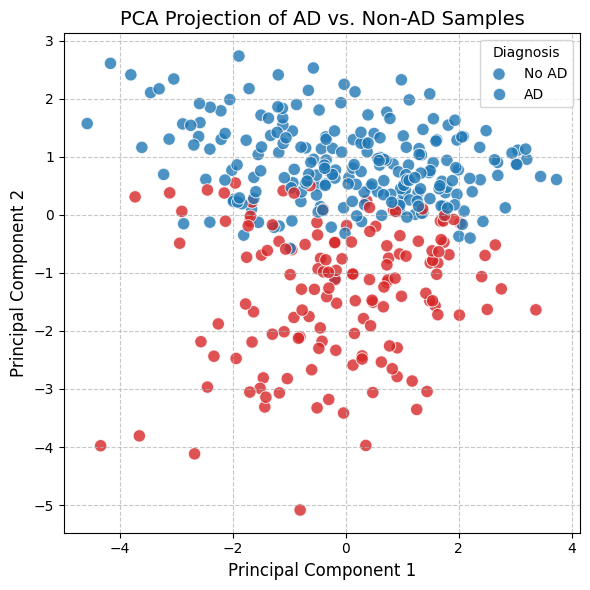

In [24]:
plt.figure(figsize=(6, 6))  # Slightly larger figure for better visibility

# Use a more distinct color palette with higher contrast
sns.scatterplot(
    x=PCA_df[0], 
    y=PCA_df[1], 
    hue=PCA_df['Group'],
    palette=['#1f77b4', '#d62728'],  # Blue and Red - high contrast colors
    s=80,  # Slightly larger markers
    alpha=0.8  # Slight transparency to see overlapping points
)

# Improve the legend
plt.legend(title='Diagnosis', labels=['No AD', 'AD'], loc='best')

# Add more descriptive labels
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Projection of AD vs. Non-AD Samples', fontsize=14)

# Add a grid for better readability of positions
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Model

In [25]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [26]:
from sklearn.metrics import (
    f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
)
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def evaluation_with_validation(model, name):
    # Cross-validation for accuracy with confidence intervals
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    std_error = stats.sem(cv_scores)  # Standard error of the mean
    confidence_interval = stats.t.interval(
        0.95, len(cv_scores) - 1, loc=mean_accuracy, scale=std_error
    )
    
    print(f"Cross-Validation Accuracy: {mean_accuracy:.4f}")
    print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
    print("-" * 30)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)
    
    # Get predicted labels
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Get unique classes
    classes = np.unique(y_train)
    n_classes = len(classes)
    
    # One-hot encode y_test for AUC calculation
    y_test_bin = label_binarize(y_test, classes=classes)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle AUC calculation correctly based on number of classes
    if n_classes == 2:
        # For binary classification, we need the probability of the positive class
        auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    else:
        # For multi-class, use the one-hot encoded labels and probabilities
        auc_score = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
    
    print("**Model Evaluation Results:**")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print("-" * 30)
    
    # Confusion Matrix & Classification Report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Learning Curve Plot
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', marker='o', color='blue')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score', marker='s', color='orange')
    
    # Added axis labels and improved title
    plt.xlabel("Number of Training Samples", fontsize=12)
    plt.ylabel("Accuracy Score", fontsize=12)
    plt.title(f"Learning Curve - {name}", fontsize=14, pad=20)
    
    # Added legend and grid
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



---------------------------------
RandomForest
Cross-Validation Accuracy: 0.9432
95% Confidence Interval: [0.8957, 0.9908]
------------------------------
**Model Evaluation Results:**
Test Accuracy: 0.9600
AUC Score: 0.9898
------------------------------
Confusion Matrix:
[[41  2]
 [ 1 31]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



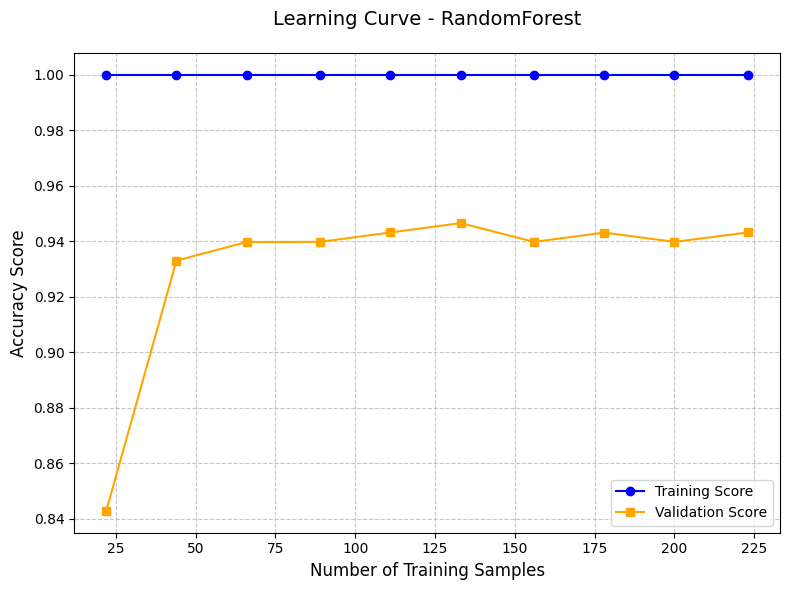

---------------------------------
AdaBoost
Cross-Validation Accuracy: 0.9498
95% Confidence Interval: [0.9059, 0.9937]
------------------------------
**Model Evaluation Results:**
Test Accuracy: 0.9333
AUC Score: 0.9833
------------------------------
Confusion Matrix:
[[41  2]
 [ 3 29]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.94      0.91      0.92        32

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



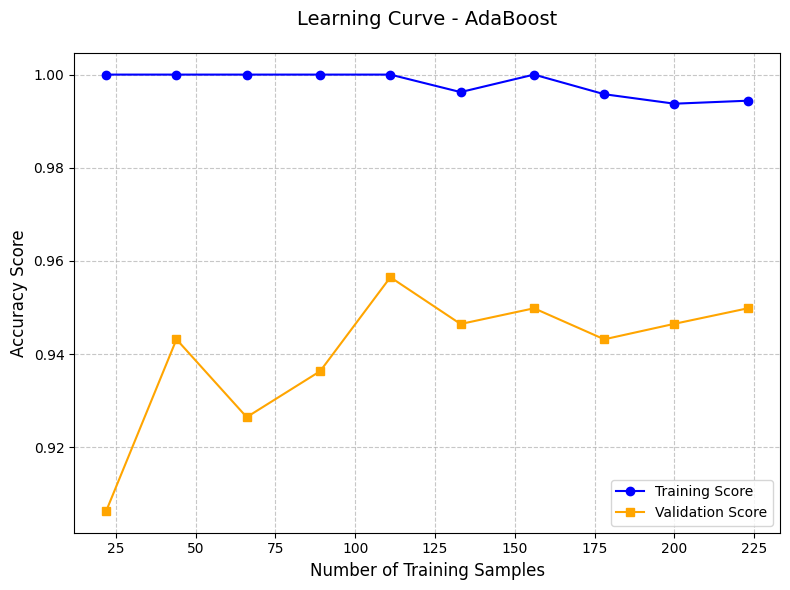

---------------------------------
SVM
Cross-Validation Accuracy: 0.9498
95% Confidence Interval: [0.9111, 0.9885]
------------------------------
**Model Evaluation Results:**
Test Accuracy: 0.9600
AUC Score: 0.9906
------------------------------
Confusion Matrix:
[[41  2]
 [ 1 31]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



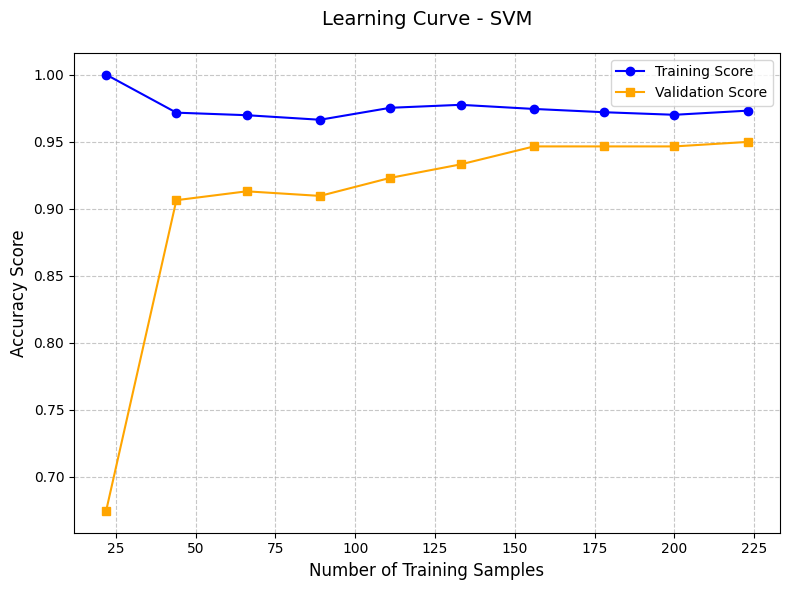

---------------------------------
KNN
Cross-Validation Accuracy: 0.9363
95% Confidence Interval: [0.8807, 0.9919]
------------------------------
**Model Evaluation Results:**
Test Accuracy: 0.9067
AUC Score: 0.9938
------------------------------
Confusion Matrix:
[[43  0]
 [ 7 25]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        43
         1.0       1.00      0.78      0.88        32

    accuracy                           0.91        75
   macro avg       0.93      0.89      0.90        75
weighted avg       0.92      0.91      0.90        75



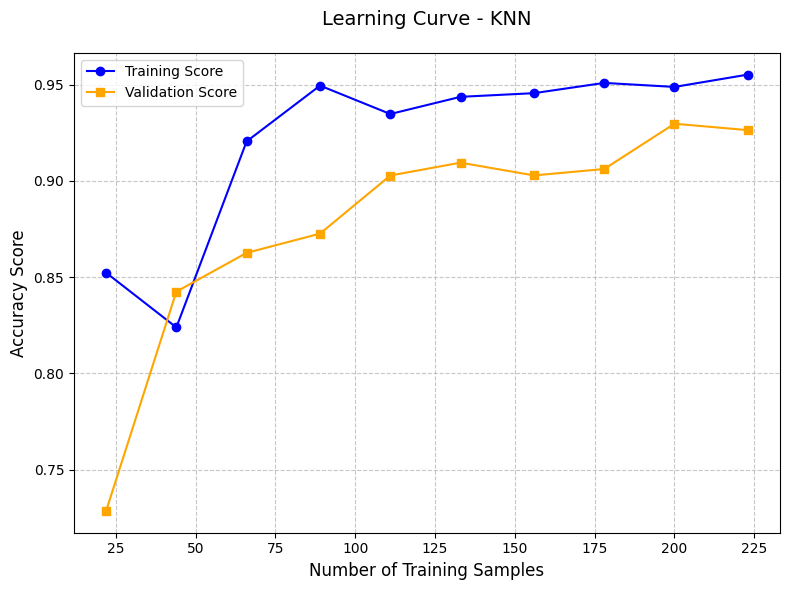

---------------------------------
LR
Cross-Validation Accuracy: 0.9598
95% Confidence Interval: [0.9283, 0.9913]
------------------------------
**Model Evaluation Results:**
Test Accuracy: 0.9600
AUC Score: 0.9935
------------------------------
Confusion Matrix:
[[41  2]
 [ 1 31]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



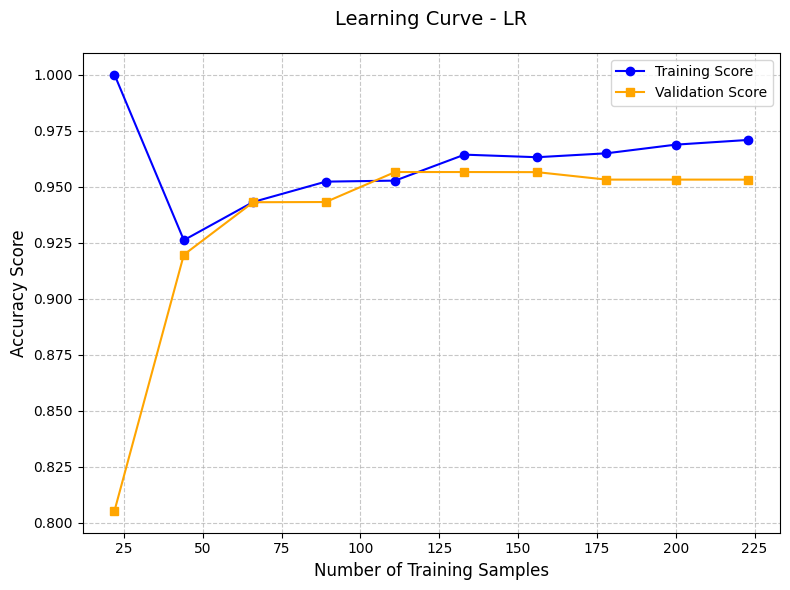

In [27]:
# Example usage
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation_with_validation(model, name)

# Prediction 

In [ ]:
import pandas as pd
import numpy as np

# Load the longitudinal dataset
df_longitudinal = pd.read_csv("D:\oasis_longitudinal.csv")

# Ensure MRI ID and Gender exist in df_longitudinal
if 'MRI ID' in df_longitudinal.columns and 'M/F' in df_longitudinal.columns:
    # Rename 'M/F' to 'Gender' for consistency
    df_longitudinal.rename(columns={'M/F': 'Gender'}, inplace=True)
else:
    print("MRI ID or Gender column missing in longitudinal dataset!")

# Train Random Forest model
RandomPipeline.fit(X_train, y_train)

# Predict probabilities and class labels
y_pred_proba = RandomPipeline.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Map numeric predictions to 'Demented' and 'Nondemented'
label_mapping = {0: 'Nondemented', 1: 'Demented'}
y_pred_mapped = [label_mapping[label] for label in y_pred]
y_test_mapped = [label_mapping[label] for label in y_test]

# Merge MRI ID & Gender from longitudinal data with X_test
X_test_with_id = df_longitudinal.loc[df_longitudinal.index.isin(X_test.index), ['MRI ID', 'Gender']]

# Handle missing values if any
X_test_with_id.fillna("Unknown", inplace=True)

# Create DataFrame for displaying results
results_df = pd.DataFrame({
    'MRI ID': X_test_with_id['MRI ID'].values,
    'Gender': X_test_with_id['Gender'].values,
    'Predicted Output': y_pred_mapped,
    'Actual Output': y_test_mapped
})

# Display  test cases
print("Predictions using Random Forest Model:")
print(results_df.head(10))


Predictions using Random Forest Model:
          MRI ID Gender Predicted Output Actual Output
0  OAS2_0001_MR1      M         Demented      Demented
1  OAS2_0002_MR2      M      Nondemented   Nondemented
2  OAS2_0004_MR1      F         Demented      Demented
3  OAS2_0005_MR3      M      Nondemented   Nondemented
4  OAS2_0009_MR1      M      Nondemented   Nondemented
5  OAS2_0013_MR1      F         Demented      Demented
6  OAS2_0014_MR1      M         Demented      Demented
7  OAS2_0017_MR3      M      Nondemented   Nondemented
8  OAS2_0018_MR1      F      Nondemented   Nondemented
9  OAS2_0021_MR1      M         Demented      Demented
